## Bibliografía

- U.S. Army Corps of Engineers (1992) - EM 1110-1-1905
- Baban (2016) - Shallow Foundations

## Librerías

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.integrate import quad
from scipy import sqrt 
import numpy as np
import pandas as pd
from IPython.display import display, Latex
from IPython.display import display, Markdown


## Carga de datos 

In [12]:
#Datos

#Limites de los estratos, en m
limites = [0,1,5,20]

# Peso unitario del suelo, en kN/m3
gamma_estratos = [17,19,22]

# Cohesión aparente, en kPa
c_estratos = [10,30,15]

# Resistencia al corte no drenada, en kPa
su_estratos = [50,50,60]

#Angulo de fricción interna, [deg] (si es no drenado poner phi=0)
phi_estratos = [28,30,31]

#Angulo de dilatancia, [deg]
psi_estratos = [4,6,3]

#Modulo de corte inicial, [MPa]
G0_ref_estratos = [60,60,60]

#Coeficiente de Poisson
v_ur_estratos = [0.20,0.20,0.20]

#Carga de preconsolidación, [kPa]
POP_estratos = [900,1800,800]


#Profundidad del nivel freático, en m
nf = 10

#Profundidad de nivel de fundacion, en [m]
D=1                
          
#Carga normal, en [kN]
V=0               


#Lado B

#Ancho de la base, en [m]
B=2    

#Excentricidad de aplicación de la carga, en [m]
e_B=0.1 

#Fuerza horizontal, [kN]
H_B=5     

#Inclinación del terreno,[deg]
beta_B=5   

#Inclinación de la base,[deg]
omega_B=5         


#Lado L

#Longitud de la base, en [m]
L=4   

#Excentricidad de aplicación de la carga, en [m]
e_L=0 

#Fuerza horizontal, [kN]
H_L=0

#Inclinación del terreno,[deg]
beta_L=5

#Inclinación de la base,[deg]
omega_L=5         

## Cálculos

### Parámetros del suelo en función de la profundidad

In [13]:
# Función para obtener gamma en función de la profundidad z
def gamma_tot(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return gamma_estratos[i]
    # Si la profundidad excede todos los límites conocidos, usar el último valor de gamma
    return gamma_estratos[-1]

def gamma_eff(z):
    return gamma_tot(z) if z <= nf else gamma_tot(z) - 10

def valor_su(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return su_estratos[i]
    return su_estratos[-1]

def valor_c(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return c_estratos[i]
    return c_estratos[-1]

def valor_phi(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return phi_estratos[i]
    return phi_estratos[-1]

def valor_psi(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return psi_estratos[i]
    return psi_estratos[-1]

def valor_G0_ref(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return G0_ref_estratos[i]
    return G0_ref_estratos[-1]

def valor_G50_ref(z):
    return valor_G0_ref(z)/9


pref=100 #presion de referencia, en kPa
m=0.5 #coeficiente

def valor_G(z):
    return valor_G50_ref(z)* ((valor_c(z)*np.cos(np.radians(valor_phi(z))) + (gamma_eff(z)*(D+0.5*B)*np.sin(np.radians(valor_phi(z)))))/((valor_c(z)*np.cos(np.radians(valor_phi(z))))+pref*np.sin(np.radians(valor_phi(z)))))**m


def valor_vu(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return vu_estratos[i]
    return vu_estratos[-1]

def valor_POP(z):
    for i in range(len(limites) - 1):
        if limites[i] <= z < limites[i + 1]:
            return POP_estratos[i]
    return POP_estratos[-1]


print(f"Para una profundidad de {D} m, gamma_total es {gamma_tot(D)} kN/m3.")
print(f"Para una profundidad de {D} m, gamma_efectiva es {gamma_eff(D)} kN/m3.")
print(f"Para una profundidad de {D} m, su es {valor_su(D)} kN/m2.")
print(f"Para una profundidad de {D} m, c es {valor_c(D)} kN/m2.")
print(f"Para una profundidad de {D} m, phi es {valor_phi(D)} grados.")
print(f"Para una profundidad de {D} m, G50_ref es {valor_G50_ref(D)} MPa.")
print(f"Para una profundidad de {D} m, G es {valor_G(D)} MPa.")




Para una profundidad de 1 m, gamma_total es 19 kN/m3.
Para una profundidad de 1 m, gamma_efectiva es 19 kN/m3.
Para una profundidad de 1 m, su es 50 kN/m2.
Para una profundidad de 1 m, c es 30 kN/m2.
Para una profundidad de 1 m, phi es 30 grados.
Para una profundidad de 1 m, G50_ref es 6.666666666666667 MPa.
Para una profundidad de 1 m, G es 5.129444356246018 MPa.


#### Índices de rigidez del suelo

In [14]:
#Lado B

#Indice de rigidez del suelo
def valor_Ir_B(z):
    return valor_G(z)*1000/(valor_c(z)+(gamma_eff(z)*(D+0.5*B))*np.tan(np.radians(valor_phi(z))))

#Indice de rigidez crítico del suelo
def valor_Irc_B(z):
    return 0.5*(np.exp((3.3-0.45*B/L))*1/(np.tan(np.radians(45-valor_phi(z)/2))))

#Lado L

#Indice de rigidez del suelo
def valor_Ir_L(z):
    return valor_G(z)*1000/(valor_c(z)+(gamma_eff(z)*(D+0.5*L))*np.tan(np.radians(valor_phi(z))))

#Indice de rigidez crítico del suelo
def valor_Irc_L(z):
    return 0.5*(np.exp((3.3-0.45*L/B))*1/(np.tan(np.radians(45-valor_phi(z)/2))))

#### Tensiones verticales

In [15]:
n_layers = len(limites)-1 #cantidad de estratos
def tension_vertical_efectiva(z,gamma_estratos,limites,nf,n_layers):
  
  tension_vertical_total = 0

  #Cálculo de tensión vertical total
  for i in range(n_layers): 
    if z > limites[i+1]: 
      h_estrato = limites[i+1]-limites[i]
    elif z > limites[i] and z <= limites[i+1]:
      h_estrato = z-limites[i]
    else:
      h_estrato = 0
    tension_vertical_total = tension_vertical_total + gamma_estratos[i]*h_estrato
  #Cálculo de presión neutra
  if z<=nf:
    presion_neutra = 0
  if z>nf:
    presion_neutra = (z-nf)*10
  
  #Cálculo de tensión vertical efectiva
  tension_vertical_efectiva = tension_vertical_total - presion_neutra
    
  return tension_vertical_efectiva

print('En el plano de fundación, la tensión vertical efectiva es de',tension_vertical_efectiva(D,gamma_estratos,limites,nf,n_layers), 'kPa')



En el plano de fundación, la tensión vertical efectiva es de 17 kPa


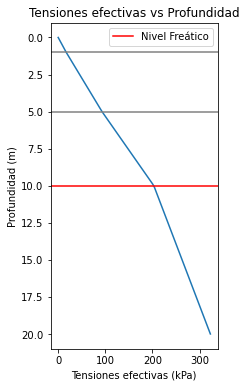

In [16]:
# Grafico de tensiones verticales 
z = np.linspace(limites[0],limites[3],100)
tensiones_efectivas = [tension_vertical_efectiva(i, gamma_estratos, limites, nf, n_layers) for i in z]
fig, ax = plt.subplots(figsize=(3,6))
ax.plot(tensiones_efectivas, z)

ax.set_title('Tensiones efectivas vs Profundidad')
ax.set_xlabel('Tensiones efectivas (kPa)')
ax.set_ylabel('Profundidad (m)')
ax.invert_yaxis()

ax.axhline(y=nf, color='r', label='Nivel Freático')
ax.axhline(y=limites[1], color='grey')
ax.axhline(y=limites[2], color='grey')
ax.legend()

plt.show()

### Factores adimensionales

Los factores $N_{c}$, $N_{q}$ y $N_{\gamma}$ adimensionales son función del ángulo de friccion interna, $\phi'$

**Modelo de Hansen**: considera bases inclinadas y pendientes, además de la forma y excentricidad de los cimientos, la inclinación de la carga y la profundidad de los cimientos. 
Los supuestos se basan en una ampliación del trabajo de Meyerhof para incluir la inclinación
de la base y la construcción en pendiente. Puede utilizarse cualquier relación D/B.

**Restricciones**: Forma de cimentación con excentricidad $s_{c}$, $s_{\gamma}$, y $s_{q}$ y factores de corrección de carga inclinada $i_{c}$, $i_{\gamma}$, y $i_{q}$ no podrán utilizarse simultáneamente. Los factores de corrección no utilizados son la unidad.

In [17]:
#Parámetros del suelo en el nivel de fundación

gamma=gamma_eff(D)
su=valor_su(D)
phi=valor_phi(D)
c=valor_c(D)
sigmav_eff=tension_vertical_efectiva (D,gamma_estratos,limites,nf,n_layers)

#Expresiones segun Hansen 1970

Nfi=np.tan(np.radians(45+phi/2))**2

if phi==0:
    Nc=np.pi+2
    Nq=1
    Ngamma=0 
else:
    Nq=np.exp(np.pi*np.tan(np.radians(phi)))*(np.tan(np.pi/4+np.radians(phi)/2))**2
    Nc=(Nq-1)*1/(np.tan(np.radians(phi)))
    Ngamma=1.5*(Nq-1)*np.tan(np.radians(phi))  

       
B_eq= B-2*e_B                                      #Ancho equivalente, en [m]
L_eq= L-2*e_L                                      #Longitud equivalente, en [m]

### Factores de corrección

Los factores de corrección $\zeta$ adimensionales consideran una variedad de opciones para modelar las condiciones reales del suelo y la fundación. Dependen de del modelo seleccionado para la solución de la capacidad portante última. Consideran: forma de cimentación con excentricidad, carga inclinada, profundidad de cimentación y base de cimentación inclinada.

In [18]:
#Correcciones segun Hansen

#Corrección por inclinación de la carga ("i")

if H_B>0:
    a_B=(1-(0.5*H_B/(V+B_eq*L_eq*c/np.tan(np.radians(phi))))if phi != 0 else 1)**5
    b_B=(1-(0.7*H_B/(V+B_eq*L_eq*c/np.tan(np.radians(phi))))if phi != 0 else 1)**5
else:
    a_B=1
    b_B=1
    
if H_L>0:
    a_L=(1-(0.5*H_L/(V+B_eq*L_eq*c/np.tan(np.radians(phi))))if phi != 0 else 1)**5
    b_L=(1-(0.7*H_L/(V+B_eq*L_eq*c/np.tan(np.radians(phi))))if phi != 0 else 1)**5
else:
    a_L=1
    b_L=1

iq_B=max(0,a_B)
igamma_B=max(0,b_B)

iq_L=max(0,a_L)
igamma_L=max(0,b_L)

if phi==0:
    ic_B=0.5-0.5*((1-H_B/(B_eq*L_eq*su))**0.5)
    ic_L=0.5-0.5*((1-H_L/(B_eq*L_eq*su))**0.5)       
else:
    ic_B=max(0,(iq_B-(1-iq_B)/(Nq-1)))
    ic_L=max(0,(iq_L-(1-iq_L)/(Nq-1)))


#Corrección por forma ("s")

sq_B=max(0,(1+np.sin(np.radians(phi))*B_eq/L_eq*iq_B))
sgamma_B=max(0.6,(1-(0.4*B_eq/L_eq*igamma_B/igamma_L if igamma_L !=0 else 1)))

sq_L=max(0,(1+np.sin(np.radians(phi))*B_eq/L_eq*iq_L))
sgamma_L=max(0.6,(1-(0.4*L_eq/B_eq*igamma_L/igamma_B if igamma_B !=0 else 1)))

if phi==0:
    sc_B=0.2*B_eq/L_eq   
    sc_L=0.2*L_eq/B_eq 
else:
    sc_B=max(0,(1+Nq/Nc*B_eq/L_eq))
    sc_L=max(0,(1+Nq/Nc*L_eq/B_eq))

#Corrección por profundidad ("d")

if D/B<=1:
    k_B=D/B #coeficiente en radianes
else:
    k_B=np.arctan(D/B)
    
if D/L<=1:
    k_L=D/L #coeficiente en radianes
else:
    k_L=np.arctan(D/L)


dq_B=max(0,1+2*np.tan(np.radians(phi))*k_B*(1-np.sin(np.radians(phi)))**2)
dgamma_B=1

dq_L=max(0,1+2*np.tan(np.radians(phi))*k_L*(1-np.sin(np.radians(phi)))**2)
dgamma_L=1

if phi==0:
    dc_B=0.4*k_B
    dc_L=0.4*k_L 
else:
    dc_B=max(0,1+0.4*k_B)
    dc_L=max(0,1+0.4*k_L)


#Corrección por inclinación de la base ("b")

bq_B=max(0,np.exp(-1*max(0,np.radians(omega_B))*np.tan(np.radians(phi))))
bgamma_B=max(0,np.exp(-2.7*max(0,np.radians(omega_B))*np.tan(np.radians(phi))))

bq_L=max(0,np.exp(-1*max(0,np.radians(omega_L))*np.tan(np.radians(phi))))
bgamma_L=max(0,np.exp(-2.7*max(0,np.radians(omega_L))*np.tan(np.radians(phi))))

if phi==0:
    bc_B=(max(0,omega_B)/147)
    bc_L=(max(0,omega_L)/147)
    
else:
    bc_B=1-max(0,omega_B)/147
    bc_L=1-max(0,omega_L)/147


#Corrección por inclinación del terreno ("g")

gq_B = max(0, (1-(0.5 * (np.tan(np.radians(beta_B)))))**5)

ggamma_B=gq_B

gq_L = max(0, (1-(0.5 * (np.tan(np.radians(beta_L)))))**5)

ggamma_L=gq_L
    
if phi==0:
    gc_B=(max(0,beta_B)/147)
    gc_L=(max(0,beta_L)/147)
    
else:
    gc_B=1-max(0,beta_B)/147
    gc_L=1-max(0,beta_L)/147


Ir_B=valor_Ir_B(D+B/2)     #Indice de rigidez del suelo a una profundidad de B/2 por debajo del nivel de fundación
Irc_B=valor_Irc_B(D+B/2)   #Indice de rigidez crítico del suelo a una profundidad de B/2 por debajo del nivel de fundación
Ir_L=valor_Ir_L(D+L/2)     #Indice de rigidez del suelo a una profundidad de L/2 por debajo del nivel de fundación
Irc_L=valor_Irc_L(D+L/2)   #Indice de rigidez crítico del suelo a una profundidad de L/2 por debajo del nivel de fundación

#Corrección por rigidez del suelo ("c") (Vesic)

if Ir_B>=Irc_B:
    cc_B=1
    cq_B=1
    cgamma_B=1
else: 
    cq_B=min(1,np.exp((-4.4+0.6*B/L)*np.tan(np.radians(phi))+((3.07*np.sin(np.radians(phi))*np.log10(2*Ir_B))/(1+np.sin(np.radians(phi))))))
    cgamma_B=cq_B
   
    if phi==0:
        cc_B=0.32+0.12*B/L+0.60*np.log(Ir_B)
    else:
        cc_B=cq_B-((1-cq_B)/(Nc*np.tan(np.radians(phi))))

if Ir_L>=Irc_L:
    cc_L=1
    cq_L=1
    cgamma_L=1
else: 
    cq_L=min(1,np.exp((-4.4+0.6*L/B)*np.tan(np.radians(phi))+((3.07*np.sin(np.radians(phi))*np.log10(2*Ir_L))/(1+np.sin(np.radians(phi))))))
    cgamma_L=cq_L
   
    if phi==0:
        cc_L=0.32+0.12*L/B+0.60*np.log(Ir_L)
    else:
        cc_L=cq_L-((1-cq_L)/(Nc*np.tan(np.radians(phi))))

### Capacidad de carga de Brinch Hansen

**Terzaghi**: mejor para suelos muy cohesivos donde D/B ≤ 1 o para una estimación rápida de qult para comparar con otros métodos. No utilizar para zapatas con momentos y/o fuerzas horizontales ni para bases inclinadas y/o terrenos inclinados. 

**Hansen, Meyerhof, Vesic**: aplica a cualquier situación.

**Hansen, Vesic**: mejor cuando la base está inclinada, cuando la zapata está en pendiente o cuando D/B > 1.

- Asentamientos totales: valor típico aceptable: 1 pulgada.
- Asentamientos diferenciales: valor típico aceptable: 1/500.

In [19]:
#Capacidad de carga - BH 

if phi==0:
    qu_B=(Nc*su*(1+sc_B+dc_B-ic_B-bc_B-gc_B-cc_B)+sigmav_eff)*((B_eq*L_eq)/(B*L))
    qu_L=(Nc*su*(1+sc_L+dc_L-ic_L-bc_L-gc_L-cc_L)+sigmav_eff)*((B_eq*L_eq)/(B*L))
else:
    qu_B=(c*Nc*ic_B*sc_B*dc_B*bc_B*gc_B*cc_B+sigmav_eff*Nq*iq_B*sq_B*dq_B*bq_B*gq_B*cc_B+0.5*gamma*B_eq*Ngamma*igamma_B*sgamma_B*dgamma_B*bgamma_B*ggamma_B*cgamma_B)*(B_eq*L_eq)/(B*L)
    qu_L=(c*Nc*ic_L*sc_L*dc_L*bc_L*gc_L*cc_L+sigmav_eff*Nq*iq_L*sq_L*dq_L*bq_L*gq_L*cc_L+0.5*gamma*L_eq*Ngamma*igamma_L*sgamma_L*dgamma_L*bgamma_L*ggamma_L*cgamma_L)*(B_eq*L_eq)/(B*L)

qu_BH=min(qu_B,qu_L)

print(np.round(qu_B,1))
print(np.round(qu_L,1))
print(np.round(qu_BH,1))

1537.4
2465.5
1537.4


## Resumen de resultados

#### Codigo

In [22]:
def redondear_valor(valor, n):
    return round(valor, n)

N_values = N_values = {"Factores": ["N_c", "N_q", "N_gamma"],
          "Valor": [Nc, Nq, Ngamma]}
N_values["Valor"] = [redondear_valor(float(valor), 2) for valor in N_values["Valor"]]
tabla_N = pd.DataFrame(N_values)


#---------------------------------------------------------------------------------
if phi==0:
    data_B = {"Lado B": ["B_eq", "L_eq", "i_c", "s_c", "d_c", "b_c", "g_c"],
          "Valor": [B_eq, L_eq, ic_B, sc_B, dc_B, bc_B, gc_B]}
else:
    data_B = {"Lado B": ["B_eq", "L_eq", "i_c", "i_q","i_gamma","s_c","s_q","s_gamma", "d_c","d_q","d_gamma","b_c","b_q","b_gamma", "g_c","g_q","g_gamma","c_c","c_q","c_gamma"],
          "Valor": [B_eq, L_eq, ic_B, iq_B, igamma_B, sc_B, sq_B, sgamma_B,dc_B, dq_B, dgamma_B, bc_B, bq_B, bgamma_B,gc_B, gq_B, ggamma_B, cc_B, cq_B, cgamma_B]}
if phi==0:
    data_L = {"Lado L": ["B_eq", "L_eq", "i_c", "s_c", "d_c", "b_c", "g_c"],
          "Valor": [B_eq, L_eq, ic_L, sc_L, dc_L, bc_L, gc_L]}
else:
    data_L = {"Lado L": ["B_eq", "L_eq", "i_c", "i_q","i_gamma","s_c","s_q","s_gamma", "d_c","d_q","d_gamma","b_c","b_q","b_gamma", "g_c","g_q","g_gamma","c_c","c_q","c_gamma"],
          "Valor": [B_eq, L_eq, ic_L, iq_L, igamma_L, sc_L, sq_L, sgamma_L,dc_L, dq_L, dgamma_L, bc_L, bq_L, bgamma_L,gc_L, gq_L, ggamma_L,cc_L, cq_L, cgamma_L]}


data_B["Valor"] = [redondear_valor(float(valor), 2) for valor in data_B["Valor"]]
data_L["Valor"] = [redondear_valor(float(valor), 2) for valor in data_L["Valor"]]

tabla_B = pd.DataFrame(data_B)
tabla_L = pd.DataFrame(data_L)

# Concatenar las tablas horizontalmente
tabla_concatenada = pd.concat([tabla_B, tabla_L], axis=1)

#---------------------------------------------------------------------------------

qu_values = qu_values = {"q_u,BH [kN/m2]": ["q_u,B", "q_u,L", "q_u"],
          "Valor": [qu_B, qu_L, qu_BH]}


qu_values["Valor"] = [redondear_valor(float(valor), 2) for valor in qu_values["Valor"]]

tabla_q = pd.DataFrame(qu_values)


#### Tablas

In [23]:
tabla_N

,Factores,Valor
0,N_c,30.14
1,N_q,18.40
2,N_gamma,15.07


In [24]:
tabla_concatenada

,Lado B,Valor,Lado L,Valor
0,B_eq,1.80,B_eq,1.80
1,L_eq,4.00,L_eq,4.00
2,i_c,0.97,i_c,1.00
3,i_q,0.97,i_q,1.00
4,i_gamma,0.95,i_gamma,1.00
5,s_c,1.27,s_c,2.36
6,s_q,1.22,s_q,1.23
7,s_gamma,0.83,s_gamma,0.60
8,d_c,1.20,d_c,1.10
9,d_q,1.14,d_q,1.07


In [ ]:
tabla_q

,"q_u,BH [kN/m2]",Valor
0,"q_u,B",1537.4
1,"q_u,L",2465.5
2,q_u,1537.4


## AUX